<a href="https://colab.research.google.com/github/ctruciosm/BasicStats/blob/main/AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Correspondência

by Carlos Trucíos

In [7]:
install.packages("FactoMineR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’, ‘Rcpp’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’




In [8]:
library(FactoMineR)

## Caso 1 

A Tabela a seguir a contém as frequências de 4 tipos de cerâmica (A, B, C e D) encontrados em 7 lugares arqueológicos diferentes (L1, L2, ..., L7). Estamos interessados em saber se existe associação entre as variáveis e, de existir, quais categorias estamos mais associadas entre si.

In [39]:
dados = read.table("https://raw.githubusercontent.com/ctruciosm/Johnson_Wichern_2007_datasets/master/T12-8.DAT")
colnames(dados) = c("A", "B", "C", "D")
row.names(dados) = c("L1", "L2", "L3", "L4", "L5", "L6", "L7")
dados

,A,B,C,D
,<int>,<int>,<int>,<int>
L1,30,10,10,39
L2,53,4,16,2
L3,73,1,41,1
L4,20,6,1,4
L5,46,36,37,13
L6,45,6,59,10
L7,16,28,169,5


In [40]:
chisq.test(dados)

Warning message in chisq.test(dados):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  dados
X-squared = 400.25, df = 18, p-value < 2.2e-16


Utilizaremos também AC para verificar se podemos unir algumas categorias (e quais).

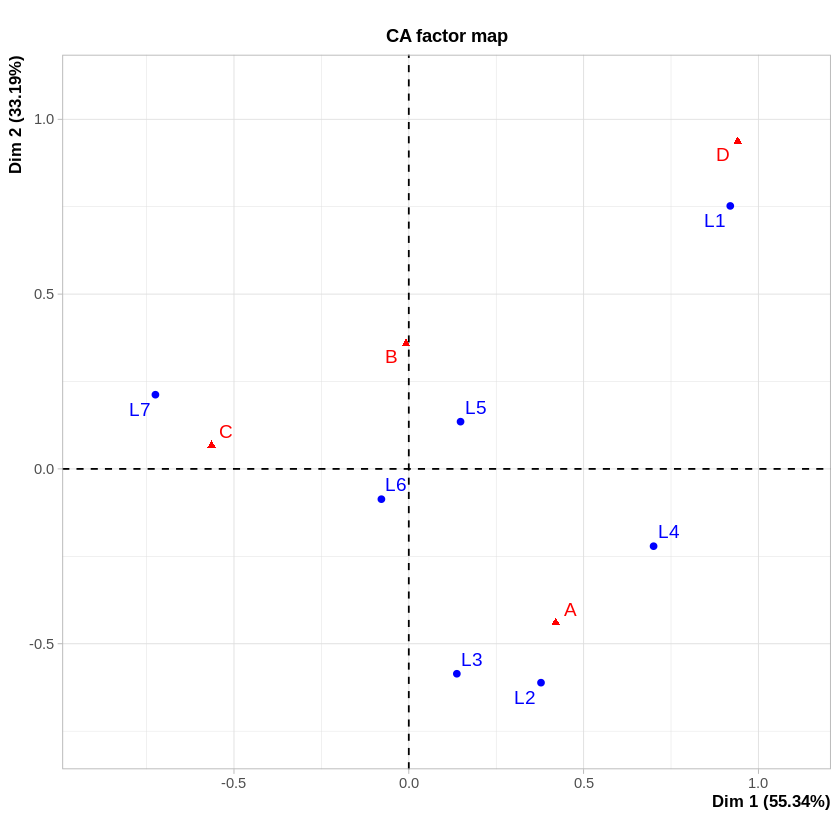

In [61]:
AC = CA(dados, ncp = 2)

### Inercia

- As porcentagens ao lado de cada uma das componentes nos dizem a porcentagem da inercia que é explicada por cada uma das componentes.
- A inercia é a soma dos autovalores ao quadrado da decomposição SVD (ou seja o valor da estatística $\chi^2$).
- A primeira componente explica 55\% da inercia total e as duas primeiras componentes explicam  mais de 88\% da inercia total.
> Ou seja, um gráfico bidimensional consegue representar bem a relação entre as categorias das variáveis.

## Regra de Interpretação

- Se os pontos referentes a duas linhas (colunas) estão próximos, isto indicam que tem um perfil linha (coluna) semelhante. Eles  poderiam ser unidos em uma única categoria caso seja necessário para melhorar a aproximação $\chi^2$
- A proximidade de um ponto representando uma linha e um ponto representando uma coluna indica que elas ocorrem, conjuntamente, mais do que o esperado se as variáveis fossem indipendentes (indicando uma associação entre as categorias).





## Interpretação

- O ponto representando o lugar L1 e o ponto representando o tipo de cerâmica D estão próximos  e afastados da origem.
- O ponto representando o lugar L7 e o ponto representando o tipo de cerâmica C estão próximos  e afastados da origem.
- O ponto representando os lugares L2 e L3 e o ponto representando o tipo de cerâmica A estão próximos  e afastados da origem.


> Essas categorias que estão próximas ocorrem com maior frequência do que ocorreriam se as variáveis fossem independentes (implicando uma associação entre elas)

In [49]:
# Note que se as variáveis fossem independes, esperariamos que:
E = sum(dados)*total_linha %o% total_coluna
E

,A,B,C,D
L1,32.24968,10.370038,37.94750,8.432778
L2,27.17670,8.738796,31.97823,7.106274
L3,42.03329,13.516005,49.45967,10.991037
L4,11.23303,3.612036,13.21767,2.937260
L5,47.83099,15.380282,56.28169,12.507042
L6,43.48271,13.982074,51.16517,11.370038
L7,78.99360,25.400768,92.95006,20.655570


In [50]:
dados

,A,B,C,D
,<int>,<int>,<int>,<int>
L1,30,10,10,39
L2,53,4,16,2
L3,73,1,41,1
L4,20,6,1,4
L5,46,36,37,13
L6,45,6,59,10
L7,16,28,169,5


# Caso 2

Uma pesquisa em cidadãos belgas que leem regularmente o jornal foi aplicada em 1980. Entre os dados coletados temos a região onde eles moram e o tipo de jornal que eles leem (dividios em três clases: flemish, french e ambos

A Tabela de frequências relativas do data set está disponível [aqui](https://raw.githubusercontent.com/ctruciosm/MVA/master/QID-1072-MVAcorrjourn/journaux.dat)

In [71]:
dados = read.table("https://raw.githubusercontent.com/ctruciosm/MVA/master/QID-1072-MVAcorrjourn/journaux.dat")
colnames(dados) = c("bWallon", "Brussels", 	"Antwerp",	"bFlemish",	"Oc Flanders",	"Or Flanders",	"Hainaut",	"Liege",	"Limburg",	"Luxembourg")
row.names(dados) = c("Flemish 1", "Flemish 2", "Flemish 3", "Flemish 4", "Flemish 5", "French 1", "French 2", "French 3", "French 4", "Both 1", "Both 2", "Both 3", "Flemish 6", "French 5", "French 6")

,bWallon,Brussels,Antwerp,bFlemish,Oc Flanders,Or Flanders,Hainaut,Liege,Limburg,Luxembourg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Flemish 1,1.8,7.8,9.1,3.0,4.3,3.9,0.1,0.3,3.3,0.0
Flemish 2,0.1,3.4,17.8,1.0,0.7,4.1,0.0,0.0,0.2,0.0
Flemish 3,0.1,9.4,4.6,7.7,4.4,5.8,1.6,0.1,1.4,0.0
Flemish 4,0.5,15.6,16.1,12.0,10.5,10.2,0.7,0.3,5.4,0.0
Flemish 5,0.1,5.2,3.3,4.8,1.6,1.4,0.1,0.0,3.5,0.0
French 1,5.6,13.7,3.1,2.4,0.5,1.7,1.9,2.3,0.2,0.2
French 2,4.1,16.5,1.9,1.0,1.0,0.9,2.4,3.2,0.1,0.3
French 3,8.3,29.5,1.8,7.3,0.8,0.4,5.1,3.2,0.2,0.3
French 4,0.9,7.8,0.2,2.6,0.1,0.1,5.6,3.8,0.1,0.8


In [72]:
chisq.test(dados)

Warning message in chisq.test(dados):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  dados
X-squared = 280.98, df = 126, p-value = 7.776e-14


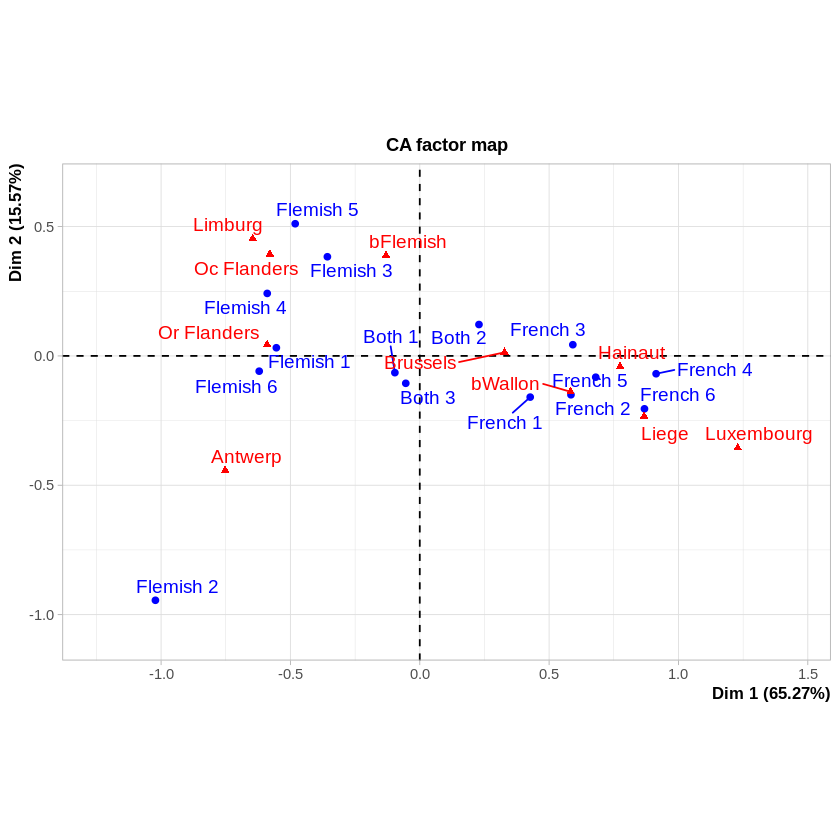

In [73]:
AC = CA(dados, ncp = 2)

**Quais _insights_ pode extrair do gráfico?**

# Caso 3 (ACM)

